In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
#image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")
# I have used this new image for my analysis and assignment.
image = url_to_image("https://homepages.cae.wisc.edu/~ece533/images/airplane.png")

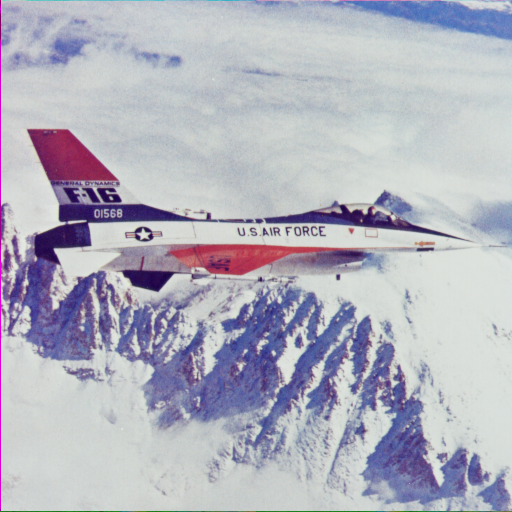

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

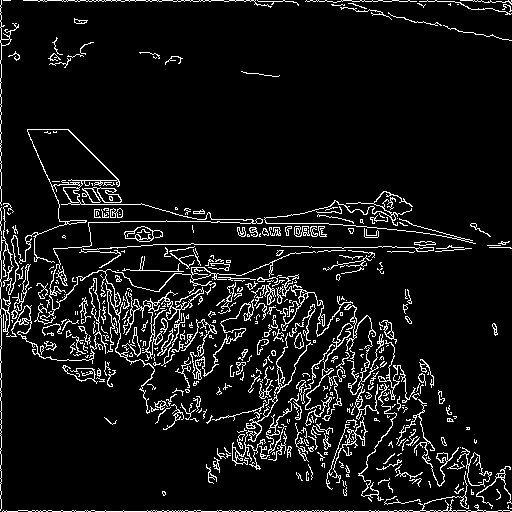

In [7]:
cv2_imshow(edges)

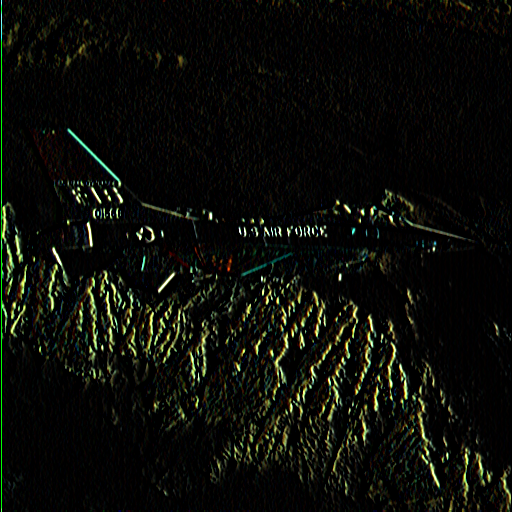

In [8]:
# Vertical filter
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

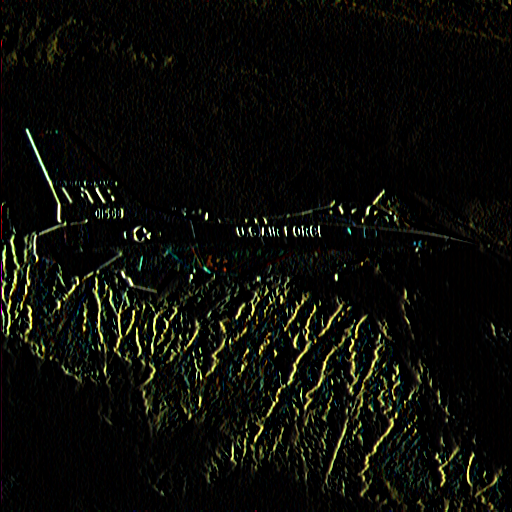

In [9]:
# Vertical filter
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

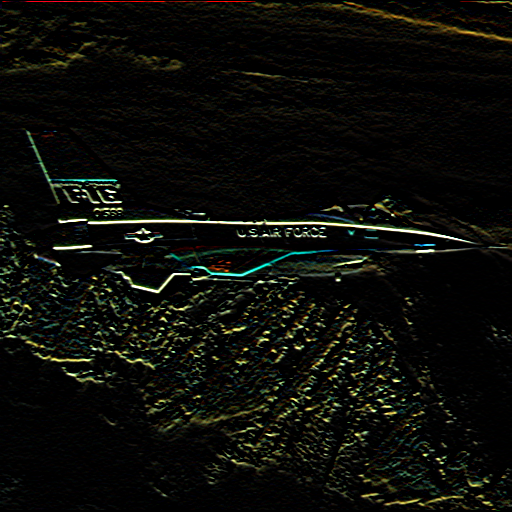

In [10]:
# Horizontal Filter
#kernel = np.ones((3,3),np.float32)/25
# kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

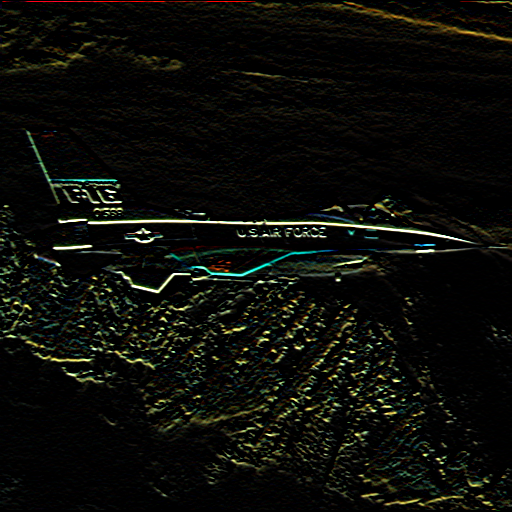

In [11]:
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

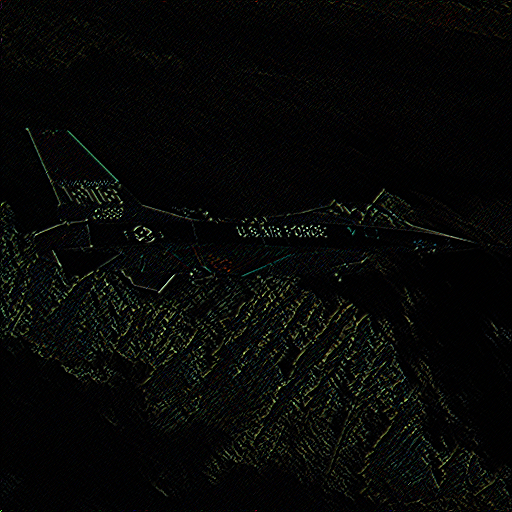

In [12]:
# 45 Degree Angle Detector (either)

kernel = np.array([[-1, -1, 2],
                   [-1, 2, -1],
                   [2, -1, -1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

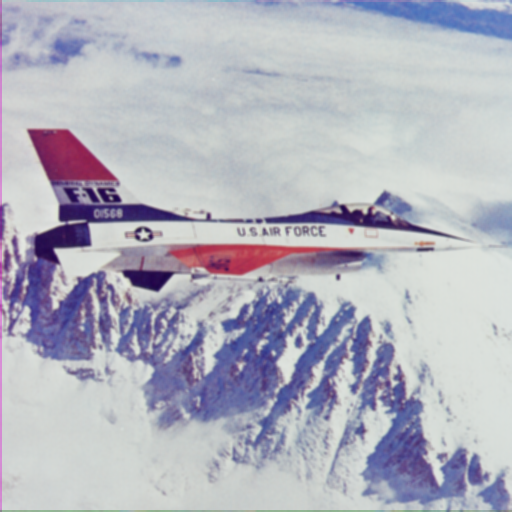

In [13]:
# Blur Kernel
# Here, I have taken average of all values of kernel to get the average of pixels around anchor pixel to make the image blur.
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

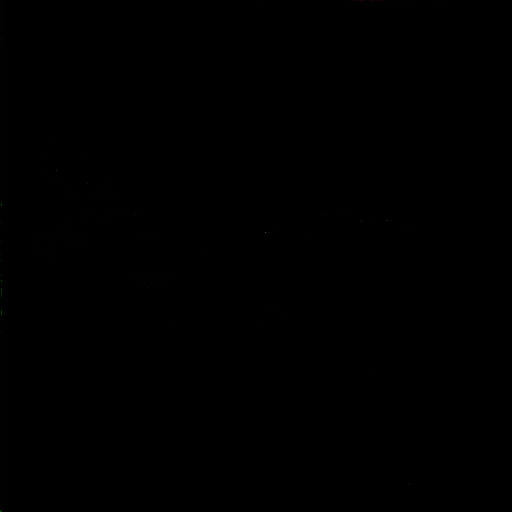

In [14]:
# Sharpen Kernel
kernel = np.array([[0, -1, 0],
                   [-1, 3, -1],
                   [0, -1, 0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

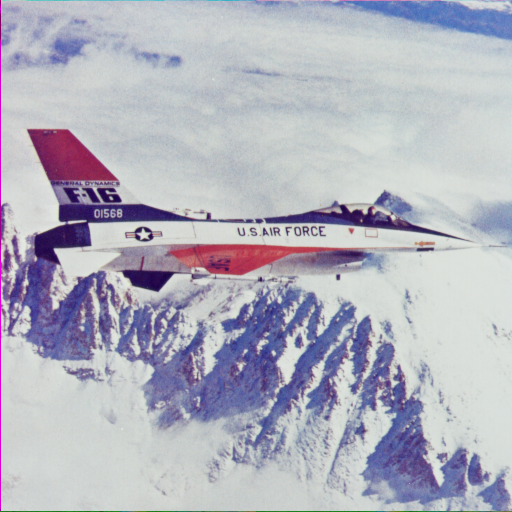

In [15]:
# Identity function (doesn't do anything)
# First of all I tried with identity matrix but it din't work, I was getting very bright image.
# I think, what is did was nothing but increased the brightness of each pixels.
# Then, I realized that, the purpose of the identity kernel is to get the same value for each of the pixels of the source image and 
# it was possible only when all the elements of kernel are equal to 0 but the anchor pixel is equal to 1, then only we would be able to retain the same value for 
# each of the pixels.
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)